In [6]:
import sentimentScore
import matplotlib.pyplot as plt
import  seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from textwrap import wrap

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
c:\Users\araf7\OneDrive\Desktop\Youtube Comment Sentiment Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129309 (\N{HANDSHAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\araf7\OneDrive\Desktop\Youtube Comment Sentiment Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127998 (\N{EMOJI MODIFIER FITZPATRICK TYPE-5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\araf7\OneDrive\Desktop\Youtube Comment Sentiment Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


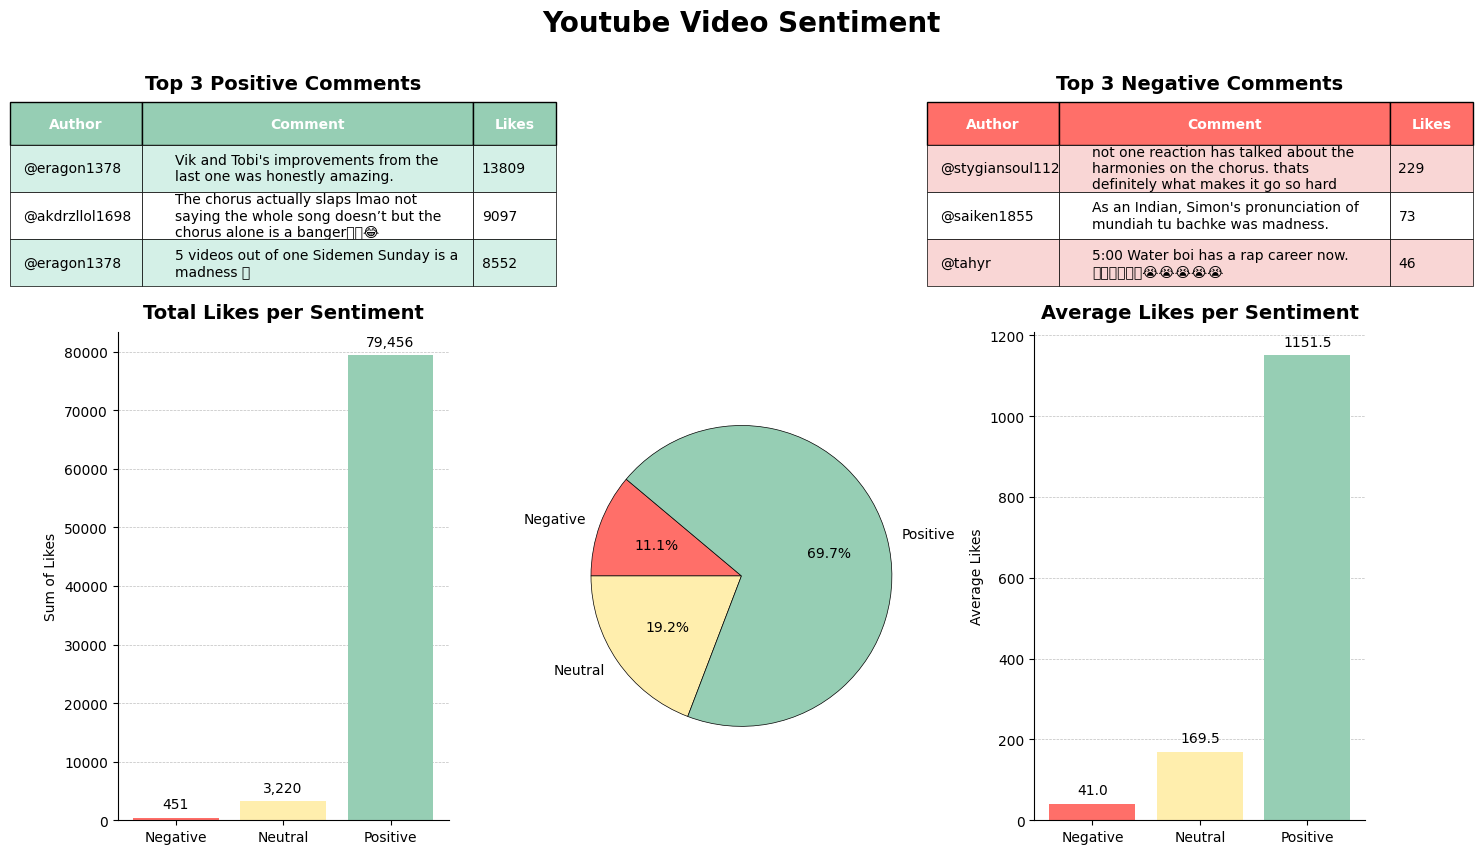

In [40]:
df = sentimentScore.get_score("9W5hNKsSWlg")
df = df.rename(columns={'Number of Likes': 'Likes'})

# Pie chart data
sentiment_counts = df['Predicted_class'].value_counts().sort_index()
sentiment_labels = ['Negative', 'Neutral', 'Positive']
colors = ['#ff6f69', '#ffeead', '#96ceb4']

# Get top 3 positive and negative comments, including Author and Likes column
top_pos = df[df['Predicted_class'] == 2].nlargest(3, 'Likes')[['Author', 'Comment', 'Likes']]
top_neg = df[df['Predicted_class'] == 0].nlargest(3, 'Likes')[['Author', 'Comment', 'Likes']]

# Wrap comments to avoid clipping
def wrap_comments(comments, width=40):
    return ['\n'.join(wrap(str(c), width)) for c in comments]

top_pos['Comment'] = wrap_comments(top_pos['Comment'])
top_neg['Comment'] = wrap_comments(top_neg['Comment'])

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(4, 3, height_ratios=[0.5, 1, 1, 2])

fig.suptitle("Youtube Video Sentiment", fontsize=20, fontweight='bold', y=0.85)

def prettify_table(ax, data, title, header_color, row_colors):
    ax.axis('off')
    table = ax.table(cellText=data.values,
                     colLabels=data.columns,
                     cellLoc='left',
                     loc='center',
                     colColours=[header_color] * len(data.columns),
                     colWidths=[0.4, 1, 0.25]) 
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor(header_color)
            cell.set_height(0.1)
        else:
            cell.set_facecolor(row_colors[(row - 1) % len(row_colors)])
            cell.set_linewidth(0.5)
            cell.set_edgecolor('black')
            if col == 2:
                cell._loc = 'center'
            else:
                cell._loc = 'left'

    table.scale(1, 3)
    ax.set_title(title, fontsize=14, pad=25, fontweight="bold")
    return table

ax_pos = fig.add_subplot(gs[1, 0])
prettify_table(ax_pos, top_pos, "Top 3 Positive Comments", header_color='#96ceb4', row_colors=['#d4f0e7', 'white'])

ax_neg = fig.add_subplot(gs[1, 2])
prettify_table(ax_neg, top_neg, "Top 3 Negative Comments", header_color='#ff6f69', row_colors=['#f9d6d5', 'white'])

# Sum of likes per class
likes_sum = df.groupby('Predicted_class')['Likes'].sum().reindex([0,1,2])
likes_sum = likes_sum.fillna(0)

ax_bar = fig.add_subplot(gs[2:, 0])
ax_bar.bar(sentiment_labels, likes_sum, color=colors)
ax_bar.set_title("Total Likes per Sentiment", fontsize=14, fontweight="bold",pad="10")
ax_bar.set_ylabel("Sum of Likes")
ax_bar.grid(True, which='both', axis='y', color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
ax_bar.set_axisbelow(True)
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)
max_likes = likes_sum.max()
for i, total_likes in enumerate(likes_sum):
    ax_bar.text(i, total_likes + max_likes*0.02, f"{total_likes:,}", ha='center', fontsize=10)

# Average likes per class
likes_avg = df.groupby('Predicted_class')['Likes'].mean().reindex([0,1,2]).fillna(0)

ax_avg = fig.add_subplot(gs[2:, 2])
ax_avg.bar(sentiment_labels, likes_avg, color=colors)
ax_avg.set_title("Average Likes per Sentiment", fontsize=14, fontweight='bold',pad="10")
ax_avg.set_ylabel("Average Likes")
ax_avg.grid(True, which='both', axis='y', color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
ax_avg.set_axisbelow(True)
ax_avg.spines['top'].set_visible(False)
ax_avg.spines['right'].set_visible(False)
max_avg = likes_avg.max()
for i, avg_likes in enumerate(likes_avg):
    ax_avg.text(i, avg_likes + max_avg*0.02, f"{avg_likes:.1f}", ha='center', fontsize=10)

ax_pie = fig.add_subplot(gs[2:, 1])
ax_pie.pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%', startangle=140,
                                      wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
ax_pie.axis('equal') 

plt.tight_layout(rect=[0, 0, 1, 0.93]) 
plt.show()

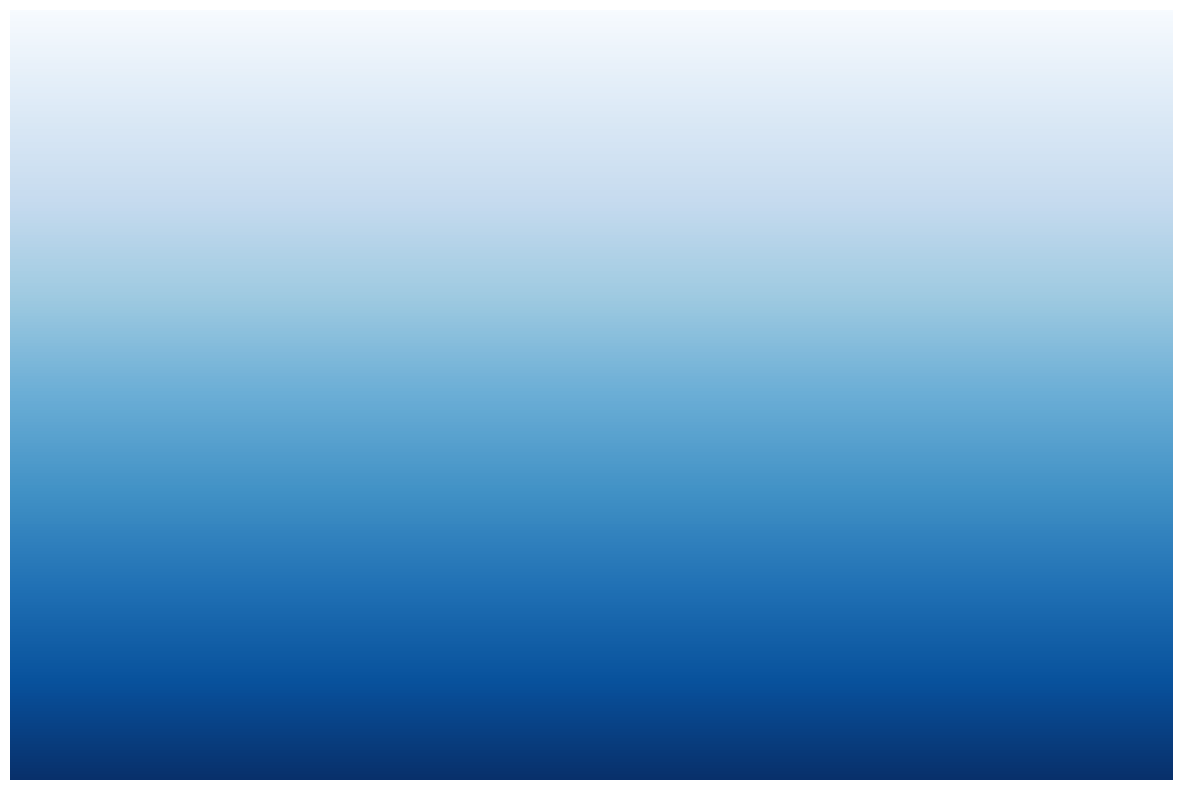

In [37]:
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(4, 3, height_ratios=[0.5, 1, 1, 2])

# Create gradient data: vertical gradient from light to darker blue
gradient = np.linspace(0.95, 0.75, 256)
gradient = np.vstack((gradient, gradient)).T  # Make vertical gradient shape (256,2)

# Add a new axis for the gradient background, spanning the entire figure
ax_bg = fig.add_subplot(gs[:, :])
ax_bg.imshow(gradient, aspect='auto', cmap='Blues', origin='lower')
ax_bg.axis('off')  # hide axes

# Set this background axis to bottom zorder so other plots go on top
ax_bg.set_zorder(-1)

plt.show()